**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

Lets Load Data

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

The first dataset contains the following features:-

- movie_id - A unique identifier for each movie.<br>
- cast - The name of lead and supporting actors.<br>
- crew - The name of Director, Editor, Composer, Writer etc.<br>

The second dataset has the following features:-<br>

- budget - The budget in which the movie was made.<br>
- genre - The genre of the movie, Action, Comedy ,Thriller etc.<br>
- homepage - A link to the homepage of the movie.<br>
- id - This is infact the movie_id as in the first dataset.<br>
- keywords - The keywords or tags related to the movie.<br>
- original_language - The language in which the movie was made.<br>
- original_title - The title of the movie before translation or adaptation.<br>
- overview - A brief description of the movie.<br>
- popularity - A numeric quantity specifying the movie popularity.<br>
- production_companies - The production house of the movie.<br>
- production_countries - The country in which it was produced.<br>
- release_date - The date on which it was released.<br>
- revenue - The worldwide revenue generated by the movie.<br>
- runtime - The running time of the movie in minutes.<br>
- status - "Released" or "Rumored".<br>
- tagline - Movie's tagline.<br>
- title - Title of the movie.<br>
- vote_average - average ratings the movie recieved.<br>
- vote_count - the count of votes recieved.<br>

In [3]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

We will be Droping the columns which is not required in the dataset

In [4]:
movies.drop(['homepage' , 'production_companies' , 'production_countries' , 'spoken_languages','keywords'] , axis=1 , inplace=True)

In [5]:
movies.columns

Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [6]:
movies.head()

,budget,genres,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


**Lets Merge the two datasets.**

In [8]:
credits.rename(columns={'movie_id':'id'} , inplace=True)
credits.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
credits.columns = ['id' ,'tittle' , 'cast' , 'crew']
movies = movies.merge(credits, on='id')
movies.columns

Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title', 'vote_average', 'vote_count', 'tittle',
       'cast', 'crew'],
      dtype='object')

In [10]:
movies.head()

,budget,genres,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Data Wrangling

In [11]:
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])


In [12]:
movies['cast'] = movies['cast'].fillna('[]').apply(literal_eval).apply(lambda x: [i['character'] for i in x] if isinstance(x, list) else [])

In [13]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [14]:
movies['director'] = movies['crew'].apply(literal_eval).apply(get_director)

In [15]:
movies.head()

,budget,genres,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,tittle,cast,crew,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[Jake Sully, Neytiri, Dr. Grace Augustine, Col...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[Captain Jack Sparrow, Will Turner, Elizabeth ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[James Bond, Blofeld, Madeleine, M, Lucia, Q, ...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[Bruce Wayne / Batman, Alfred Pennyworth, Jame...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[John Carter, Dejah Thoris, Sola, Tars Tarkas,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton


In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 19 columns):
budget               4803 non-null int64
genres               4803 non-null object
id                   4803 non-null int64
original_language    4803 non-null object
original_title       4803 non-null object
overview             4800 non-null object
popularity           4803 non-null float64
release_date         4802 non-null object
revenue              4803 non-null int64
runtime              4801 non-null float64
status               4803 non-null object
tagline              3959 non-null object
title                4803 non-null object
vote_average         4803 non-null float64
vote_count           4803 non-null int64
tittle               4803 non-null object
cast                 4803 non-null object
crew                 4803 non-null object
director             4773 non-null object
dtypes: float64(3), int64(4), object(12)
memory usage: 750.5+ KB


In [17]:
movies.isnull().sum()

budget                 0
genres                 0
id                     0
original_language      0
original_title         0
overview               3
popularity             0
release_date           1
revenue                0
runtime                2
status                 0
tagline              844
title                  0
vote_average           0
vote_count             0
tittle                 0
cast                   0
crew                   0
director              30
dtype: int64

In [18]:
#movies.drop(['title_y' , 'crew_y' , 'cast_y'] , axis = 1,inplace=True)

In [19]:
movies.drop(['tagline','tittle','crew' , 'original_title'],axis=1,inplace=True)

In [20]:
#movies.drop(['tittle'],axis=1,inplace=True)

In [21]:
movies.head()

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"[Jake Sully, Neytiri, Dr. Grace Augustine, Col...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,"[Captain Jack Sparrow, Will Turner, Elizabeth ...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",206647,en,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,"[James Bond, Blofeld, Madeleine, M, Lucia, Q, ...",Sam Mendes
3,250000000,"[Action, Crime, Drama, Thriller]",49026,en,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106,"[Bruce Wayne / Batman, Alfred Pennyworth, Jame...",Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",49529,en,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,John Carter,6.1,2124,"[John Carter, Dejah Thoris, Sola, Tars Tarkas,...",Andrew Stanton


In [22]:
#movies.isnull().sum()

In [23]:
movies = movies.dropna()

In [24]:
movies.isnull().sum()

budget               0
genres               0
id                   0
original_language    0
overview             0
popularity           0
release_date         0
revenue              0
runtime              0
status               0
title                0
vote_average         0
vote_count           0
cast                 0
director             0
dtype: int64

(-57625000.0, 98575000.0, 39050000.0)

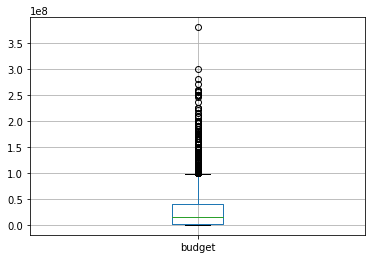

In [32]:
movies.boxplot('budget')
IQR = movies.budget.quantile(0.75)-movies.budget.quantile(0.25)
lower_fence1 = movies.budget.quantile(0.25) - (IQR*1.5)
higher_fence1 = movies.budget.quantile(0.75) + (IQR*1.5)
lower_fence1,higher_fence1,IQR

In [ ]:
movies.boxplot('revenue')
IQR = movies.revenue.quantile(0.75)-movies.revenue.quantile(0.25)
lower_fence = movies.revenue.quantile(0.25) - (IQR*1.5)
higher_fence = movies.revenue.quantile(0.75) + (IQR*1.5)
lower_fence,higher_fence,IQR

In [38]:
movies.loc[movies.budget >= higher_fence1 , 'budget'] = higher_fence1
movies.loc[movies.revenue >= higher_fence , 'revenue'] = higher_fence

(-140518878.375, 234198130.625, 93679252.25)

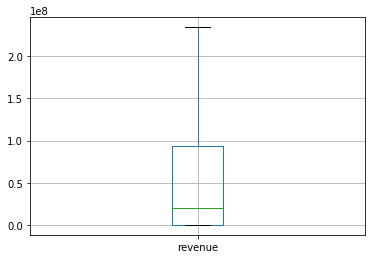

In [39]:
movies.boxplot('revenue')
IQR = movies.revenue.quantile(0.75)-movies.revenue.quantile(0.25)
lower_fence = movies.revenue.quantile(0.25) - (IQR*1.5)
higher_fence = movies.revenue.quantile(0.75) + (IQR*1.5)
lower_fence,higher_fence,IQR

(-57625000.0, 98575000.0, 39050000.0)

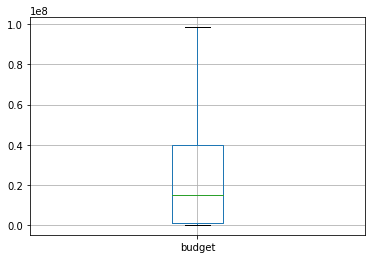

In [40]:
movies.boxplot('budget')
IQR = movies.budget.quantile(0.75)-movies.budget.quantile(0.25)
lower_fence1 = movies.budget.quantile(0.25) - (IQR*1.5)
higher_fence1 = movies.budget.quantile(0.75) + (IQR*1.5)
lower_fence1,higher_fence1,IQR

# Top 10 most buget movie

In [25]:
data = movies[['budget' , 'original_title']]

KeyError: "['original_title'] not in index"

In [ ]:
data.rename(columns = {'original_title' : 'movie_title'} , inplace = True)

In [ ]:
data.head()

In [ ]:
data = data.sort_values('budget' , ascending=False).head(10)
data

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x= 'movie_title' , y = 'budget' , data=data)
plt.xlabel('Movie Title')
plt.ylabel('Budget')
plt.xticks(rotation = 45)
plt.show()

## Most Popular Movie

In [ ]:
data = movies[["popularity" , 'original_title']]
data.head()

In [ ]:
data = data.sort_values('popularity' , ascending=False).head(10)
data

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x = 'original_title' , y='popularity' , data =data)

plt.xlabel('Movie Title')
plt.ylabel("popularity")
plt.xticks(rotation = 45)
plt.show()

## Top 10 Best Imdb Rated Movie

In [ ]:
data = movies[['original_title' , 'vote_average']]
data.head()

In [ ]:
data = data.sort_values('vote_average' , ascending=False).head(10)
data

In [ ]:
credits.columns

In [ ]:
credits.head()

In [ ]:
import numpy as np


In [ ]:
np.random.normal()

In [ ]:
plt.hist()